<a href="https://colab.research.google.com/github/ehsan94/Deep-Learning/blob/master/Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.2.0-rc2


In [0]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

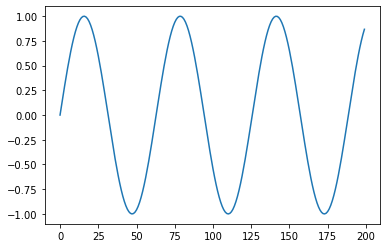

In [4]:
# make the original data
series = np.sin(0.1*np.arange(200)) #+ np.random.randn(200)*0.1

# plot it
plt.plot(series)
plt.show()

In [5]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [6]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.1),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 0s 44ms/step - loss: 0.6282 - val_loss: 0.4796
Epoch 2/80
3/3 [==============================] - 0s 10ms/step - loss: 0.4367 - val_loss: 0.1488
Epoch 3/80
3/3 [==============================] - 0s 10ms/step - loss: 0.1133 - val_loss: 0.1512
Epoch 4/80
3/3 [==============================] - 0s 10ms/step - loss: 0.1601 - val_loss: 0.0324
Epoch 5/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0323 - val_loss: 0.0786
Epoch 6/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0710 - val_loss: 0.0274
Epoch 7/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0262 - val_loss: 0.0696
Epoch 8/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0561 - val_loss: 0.0593
Epoch 9/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0258 - val_loss: 0.0241
Epoch 10/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0268 - val_loss: 0.0201
Epoch 11/80
3/3 [============

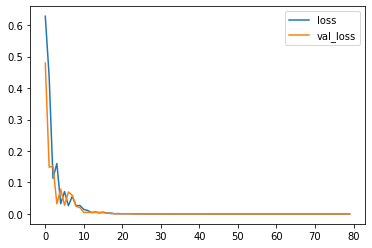

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [0]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

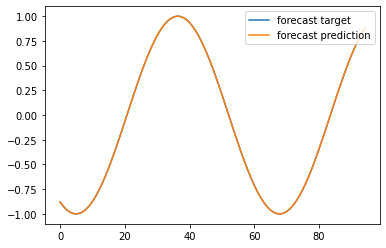

In [9]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()